In [ ]:
import numpy as np
import random
from src.solver import *
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [198]:
input_path = 'examples/test_EuS/'
magnetic_atom = 'Eu'

100%|██████████| 7/7 [00:49<00:00,  7.08s/it]



 good structures:
	afm1 afm2 afm3 afm5 afm6 afm7 fm0

bad structures: 
	afm4

nn_matrix:
[[  1.  12.   6.  24.  12.  24.   8.]
 [  1.   0.   2.   0.   4.   0.  -8.]
 [  1.   0.   6.   0. -12.   0.   8.]
 [  1.   2.   0.   0.   0.  -4.   0.]
 [  1.  -6.   0.   0.   0.  12.   0.]
 [  1.   4.  -6.   8. -12.   8.  -8.]
 [  1.   4.  -2.  -8.   4.   8.   8.]]

-------------------------------------------------------------------------------
Exact solution method: 

E_geom, eV:

	[2.14285036 2.14239067 2.14051222 2.1410111 ]

Exchange coupling vector by exact solution (J, meV): 
 
	1 : [0.09]
	2 : [0.01 0.23]
	3 : [0.3  0.07 0.27]
	6 : [0.16 0.06 0.14 0.05 0.03 0.05]


Critical temperature (Tc, K):

	[ 4.   5.7 41.3 29.1]

-------------------------------------------------------------------------------
Least squares method: 

E_geom, eV:

	[-2.14108036 -2.14103186 -2.14100723 -2.14115959 -2.14079007 -2.1410111 ]

Exchange coupling vector by least squares method (J, meV): 
 
	1 : [0.1]
	2 : [0.0

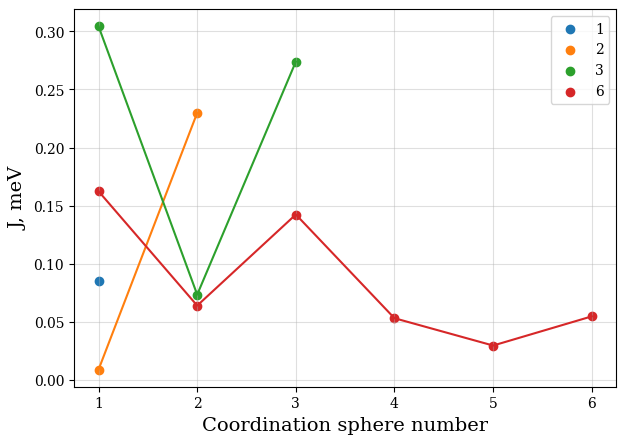

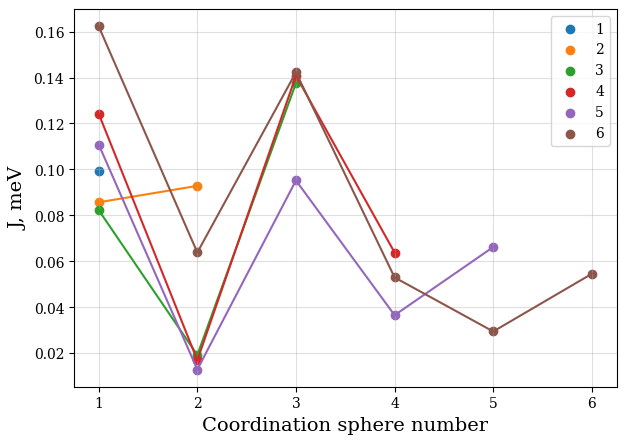

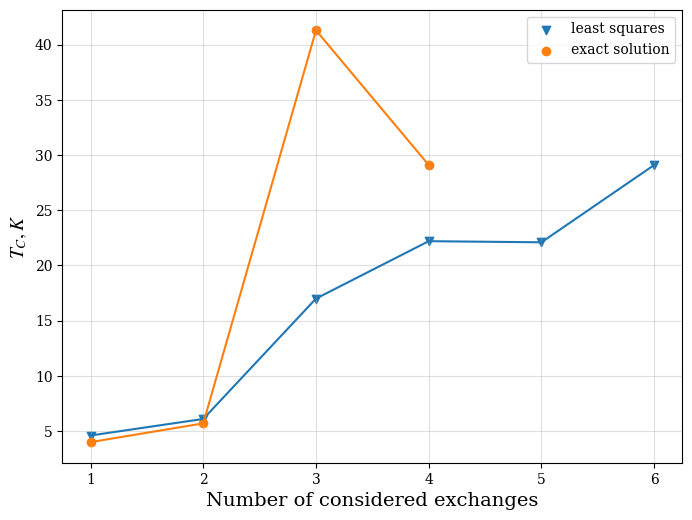

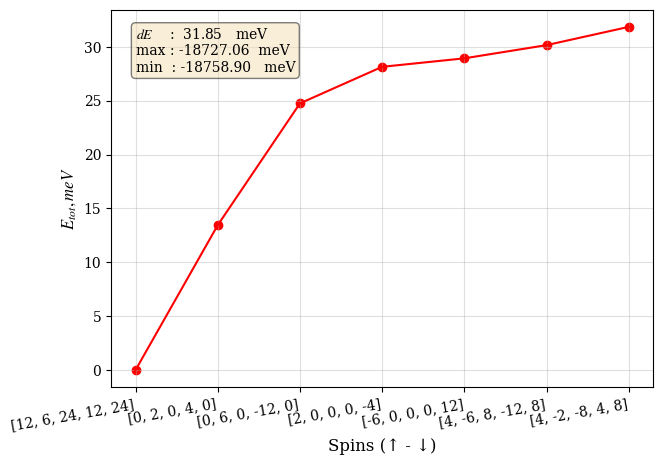

In [199]:
solver(input_path, magnetic_atom)

In [200]:
spin_dict = {'Eu': 2.5, 'Fe': 2, 'Co': 1.5, 'Ni': 1, 'Cu': 0.5, 'Sm': 3, 'Nd': 1}
spin = spin_dict[magnetic_atom]
nn_matrix, sorted_matrix, good_struct_list, bad_struct_list = sorted_matrix_getter(
        input_path, magnetic_atom, spin)
Egeom_exact_list, j_exact_list = j_vector_exact(sorted_matrix)
Egeom_lstsq_list, j_lstsq_list = j_vector_lstsq(sorted_matrix)

z_vector = get_nn_list(path_to_poscar=os.path.join(input_path, 'POSCAR'),
                           magnetic_atom=magnetic_atom)

Tc_exact = Tc_list_getter(j_exact_list, z_vector)
Tc_lstsq = Tc_list_getter(j_lstsq_list, z_vector)

100%|██████████| 7/7 [00:50<00:00,  7.22s/it]


In [201]:
matrix = sorted_matrix / (spin * (spin + 1))

coeffs = matrix[...,1:-1]

E_dft = matrix[...,-1:]

E_fitted_list = []
for i, j_vector in enumerate(j_lstsq_list):
    E_fit = coeffs[...,:j_vector.shape[0]] @ j_vector + Egeom_lstsq_list[i]
    E_fitted_list.append(E_fit)

In [202]:
from sklearn.metrics import r2_score, mean_squared_error

from matplotlib.offsetbox import AnchoredText

In [203]:
def plot_fitting_energies(E_fit, E_dft):
    E_fit = E_fit * 1000
    E_dft = E_dft * 1000
    full_list = np.append(E_fit, E_dft)
    E_min = min(full_list)
    E_max = max(full_list)

    plt.grid(alpha=.4)
    l_space = np.linspace(E_min, E_max)
    plt.plot(l_space, l_space, ls='--', color='r')
    plt.scatter(E_fit, E_dft, color='g', s=100)
    plt.xlabel(r'$E^{fit}, meV$', fontsize=18)
    plt.ylabel(r'$E^{DFT}, meV$', fontsize=18)
    
    mse = mean_squared_error(E_dft, E_fit) ** 0.5
    
    text = f"""$RMSE$    :  {mse:.4f}   meV"""
    text_box = AnchoredText(text, frameon=True, loc=2, pad=0.5, prop=dict(fontweight="bold", fontsize=18))
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    plt.gca().add_artist(text_box)

In [204]:
len(E_dft)

7

ValueError: num must be 1 <= num <= 6, not 7

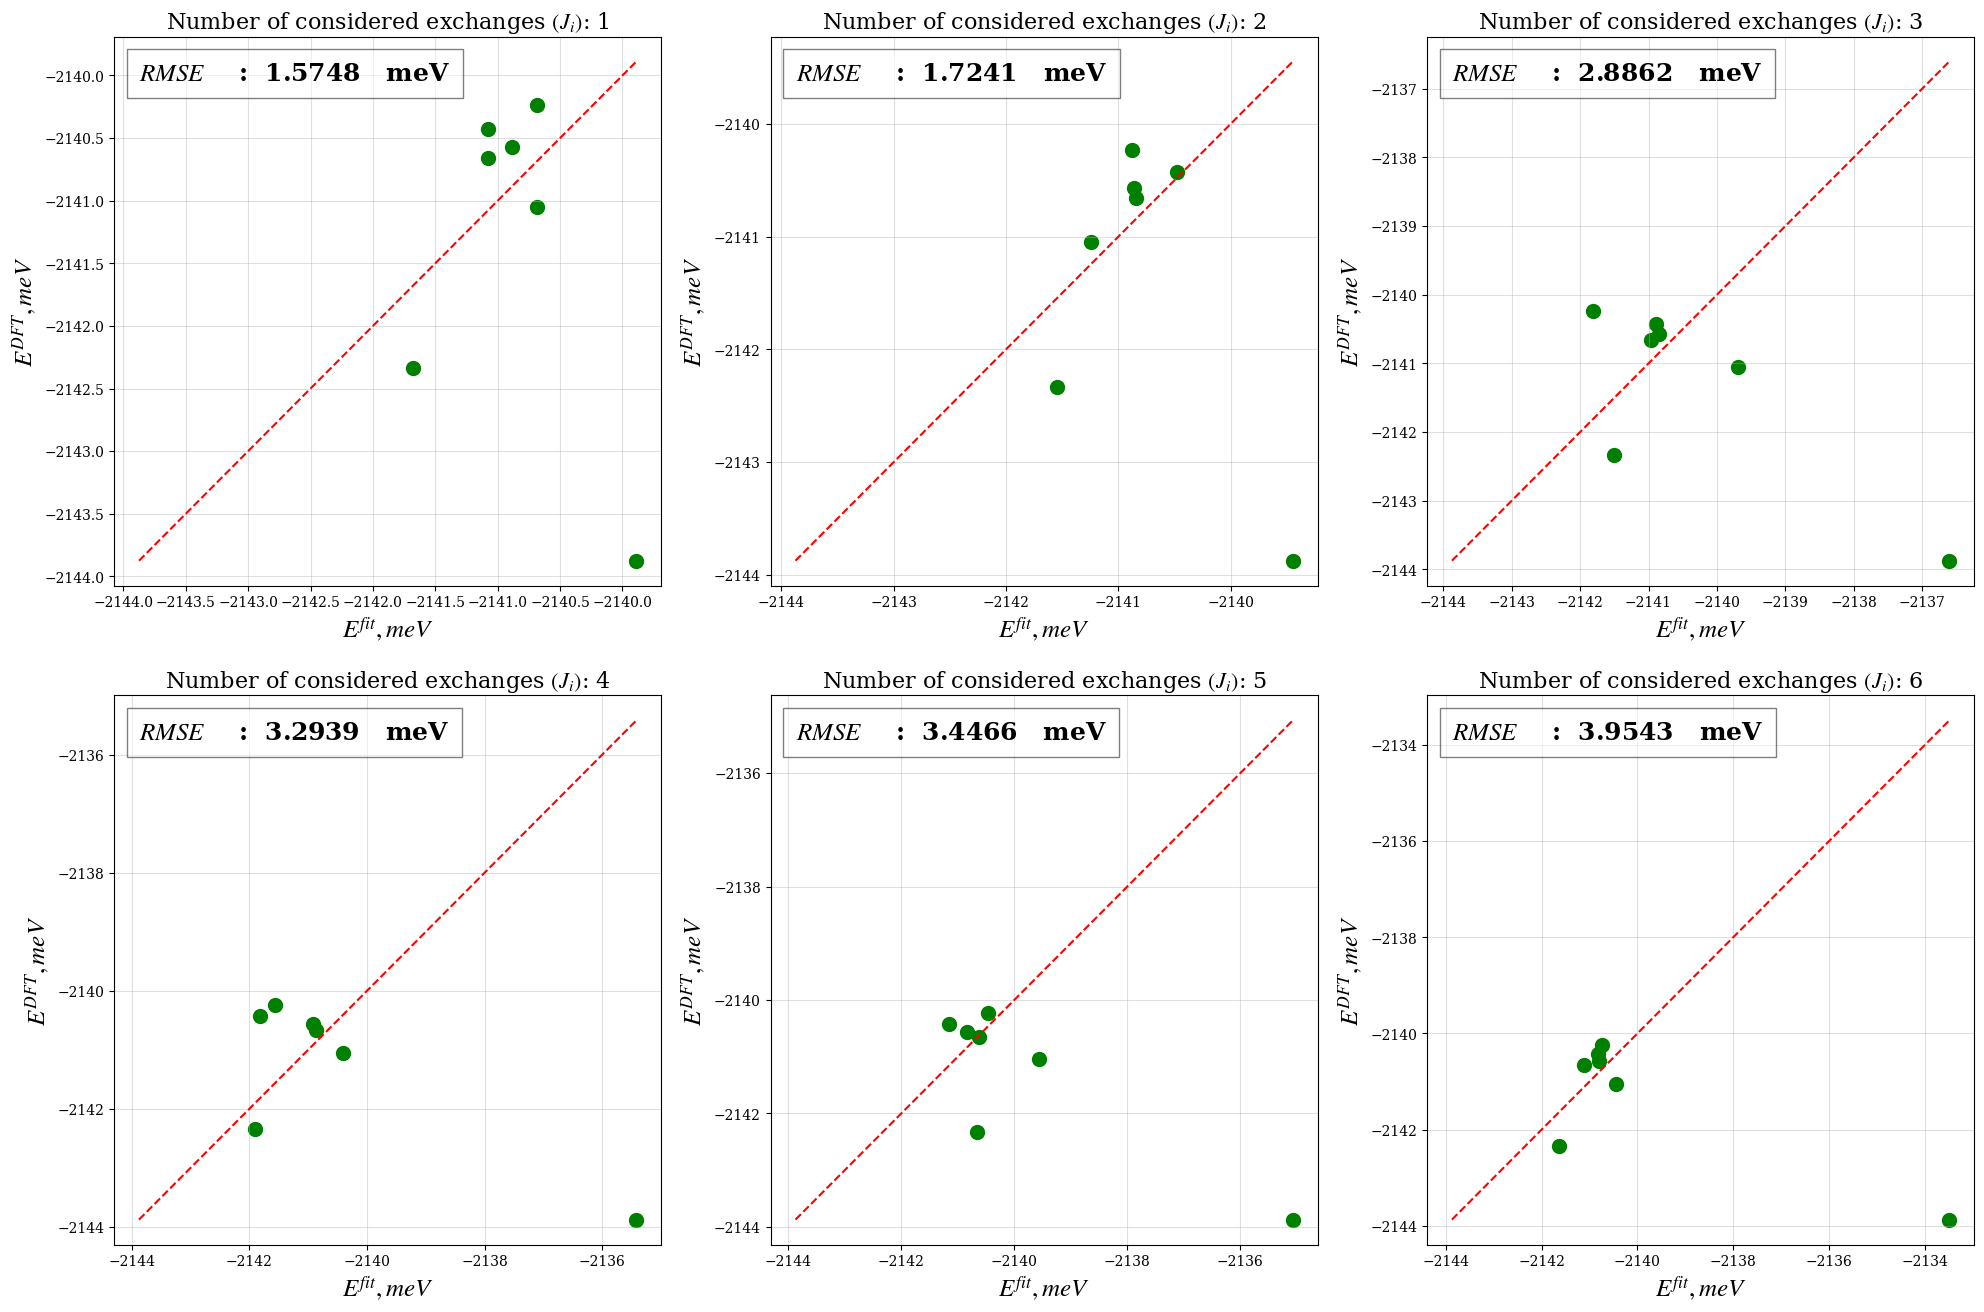

In [207]:
plt.figure(figsize = (24, 16), dpi=100)
for i in range(0, len(E_dft)):
    plt.subplot(2, 3, i + 1)
    plot_fitting_energies(E_fitted_list[i], E_dft=E_dft)
    plt.title(r'Number of considered exchanges $(J_i)$: ' + str(i + 1), fontsize=16)

In [1]:
ls

ML_model/             examples/             jupyter/
README.md             examples_old/         new_func_tests.ipynb
__pycache__/          images/               old_src/
enumlib/              install.sh*           src/


In [16]:
with open('install.sh', 'r') as inf:
    a = inf.read()
    b = inf.readlines()
    

In [21]:
with open('install.sh') as f:
    my_tesxt = f.read()
    my_lines = f.readlines()

In [20]:
inf

<_io.TextIOWrapper name='install.sh' mode='r' encoding='UTF-8'>

In [22]:
my_tesxt

'#!/bin/bash\n\n#compile the symlib submodule\ncd enumlib/symlib/src\nexport F90=gfortran\nmake\n\n#make the enumeration library itself\ncd ../../src\nmake\nmake enum.x\nmake makestr.x\n'